In [2]:
# Instala o pacote mahotas
!pip install mahotas gdown tqdm

In [3]:
# Importa os pacotes necessários
import mahotas
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
import gdown
from tqdm.auto import tqdm

In [4]:
# função que extrai as características da imagem
def describe(image):
	# extrai a média e desvio padrão de cada canal do espaço HSV.
	(means, stds) = cv2.meanStdDev(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))
	colorStats = np.concatenate([means, stds]).flatten()
	# converte a imagem para a escala de cinza
	gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	# extrai Haralick texture features
	haralick = mahotas.features.haralick(gray).mean(axis=0)
	# retorna um vetor formado por estatísticas básicas e das Haralick texture features
	return np.hstack([colorStats, haralick])  # colorStats=(6,) haralick=(13,)

In [5]:
url = 'https://drive.google.com/file/d/1bHHgeZ3H75oigySkcZG0S98unOJNft0b/view?usp=sharing'
output = '4scenes.zip'
gdown.download(url=url, output=output, quiet=False, fuzzy=True)

Downloading...
From (original): https://drive.google.com/uc?id=1bHHgeZ3H75oigySkcZG0S98unOJNft0b
From (redirected): https://drive.google.com/uc?id=1bHHgeZ3H75oigySkcZG0S98unOJNft0b&confirm=t&uuid=e589926d-353f-4155-b3af-1043e99453e7
To: /content/4scenes.zip
100%|██████████| 54.8M/54.8M [00:00<00:00, 90.8MB/s]


'4scenes.zip'

In [6]:
!ls -l

total 53472
-rw-r--r-- 1 root root 54751226 Apr 28 11:57 4scenes.zip
drwxr-xr-x 1 root root     4096 Sep 19 13:40 sample_data


In [7]:
# descompactando o conjunto de dados.
# Se já descompactou antes, descomente a linha abaixo
#!rm -rf '4scenes'
!unzip -q '/content/4scenes.zip'

Para cada imagem no diretório, vamos criar um rótulo a partir do próprio nome do arquivo e extrair as características que serão utilizadas pelo algoritmo de classificação.

In [8]:
# construindo a base de dados a partir das features extraídas do conjunto 4scenes

imagesPath = './4scenes'
labels = []
data = []

# lista todos os nomes de arquivos presentes no diretório especificado em imagesPath
# o resultado (files) é uma lista de strings, onde cada string é o nome de um arquivo
files = os.listdir(imagesPath)

for image_name in tqdm(files, desc="[INFO] Processando imagens"):
  # extraindo o rótulo das imagens (primeira parte do nome do arquivo)
  label = image_name.split("_")[0]
  # carregando a imagem
  image = cv2.imread(imagesPath + '/' + image_name)
  # extraindo as features da imagem
  features = describe(image)
  # adicionando o rótulo da imagem (classe) em uma lista de rótulos
  labels.append(label)
  # adicionando a imagem (features) ao conjunto de dados
  data.append(features)


[INFO] Processando imagens:   0%|          | 0/1240 [00:00<?, ?it/s]

Tamanho da imagem: (256, 256, 3)


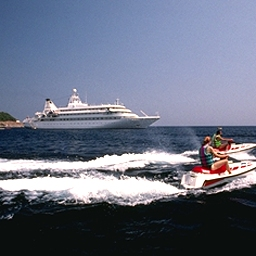

In [9]:
sample_image = cv2.imread('4scenes/coast_arnat59.jpg')#vizualisa a imagem
print(f'Tamanho da imagem: {sample_image.shape}')
cv2_imshow(sample_image)

# Tarefa

1. Divida o conjunto de dados 4scenes em 3 subconjuntos disjuntos: Treinamento (70%), Validação (15%) e Teste (15%).

2. Utilize o conjunto de validação para selecionar os melhores hiperparâmetros para os seguintes algoritmos de AM:

- [k-NN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html): use o conjunto de validação para selecionar o melhor valor do hiperparâmetro k (número de vizinhos mais próximos).
- [Árvore de decisão](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html):use o conjunto de validação para selecionar o melhor valor do hiperparâmetro max_depth (profundidade da árvore).

Isto é, treine os modelos com o conjunto de treinamento e observe as suas performances no conjunto de validação para diferentes valores do hiperparâmetro em questão. Selecione a melhor configuração.

Plotar a accurácia (eixo y)  e hiperparâmetro (eixo x) considerando o conjunto de validação.

3. Treine os seguintes modelos com a união dos subconjuntos Treinamento + Validação. No caso do k-NN e da Árvore de Decisão utilize os hiperparâmetros selecionados no item anterior.
- [k-NN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
- [Árvore de decisão](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

4. Compare a performance do k-NN e da Árvore de Decisão utilizando o conjunto de Teste e a função `classification_report` e também observando a matriz de confusão.

**Entregáveis**:

1. Código (notebook `*.ipynb`).

2. Relatório `*.pdf` (compile seus resultados e inclua as figuras).

In [10]:
#1
# construir as bases de treinamento e teste #HOLDOUT
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(data), np.array(labels), test_size=0.30, random_state=42)
(validationData, testData, validationLabels, testLabels) = train_test_split(np.array(testData), np.array(testLabels), test_size=0.50, random_state=42)

# Treino e teste para Árvore de decisão


In [ ]:
depths = [1, 3, 7, 15]
for i in depths:
  # iniciar o modelo como árvore de decisão
  model = DecisionTreeClassifier(random_state=84, max_depth=i)#MAX PROFUNDIDADE
  # treinar o modelo
  print("[INFO] treinando modelo...")
  print(i)
  model.fit(trainData, trainLabels)
  print("[INFO] avaliando...")
  predictions = model.predict(validationData)
  print(classification_report(validationLabels, predictions))#VE A PRECISAO REVOCAÇÃO METRICA E ACURACIA

[INFO] treinando modelo...
1
[INFO] avaliando...
              precision    recall  f1-score   support

       coast       0.35      1.00      0.52        51
      forest       0.98      0.91      0.94        45
     highway       0.00      0.00      0.00        44
      street       0.00      0.00      0.00        46

    accuracy                           0.49       186
   macro avg       0.33      0.48      0.37       186
weighted avg       0.33      0.49      0.37       186

[INFO] treinando modelo...
3
[INFO] avaliando...
              precision    recall  f1-score   support

       coast       0.70      0.37      0.49        51
      forest       1.00      0.89      0.94        45
     highway       0.51      0.75      0.61        44
      street       0.76      0.89      0.82        46

    accuracy                           0.72       186
   macro avg       0.74      0.73      0.71       186
weighted avg       0.74      0.72      0.71       186

[INFO] treinando modelo...
7
[IN

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Treino e teste para K-NN

In [ ]:
K_values = [1, 3, 7, 15]
for i in K_values:
  # iniciar o modelo como vizinhos próximos
  knn = KNeighborsClassifier(n_neighbors=i)#MAX VIZINHOS
  # treinar o modelo
  print("[INFO] treinando modelo...")
  print(i)
  knn.fit(trainData, trainLabels)
  print("[INFO] avaliando...")
  predictions = knn.predict(validationData)
  print(classification_report(validationLabels, predictions))#VE A PRECISAO REVOCAÇÃO METRICA E ACURACIA

[INFO] treinando modelo...
1
[INFO] avaliando...
              precision    recall  f1-score   support

       coast       0.50      0.49      0.50        51
      forest       0.64      0.67      0.65        45
     highway       0.50      0.55      0.52        44
      street       0.59      0.52      0.55        46

    accuracy                           0.55       186
   macro avg       0.56      0.56      0.56       186
weighted avg       0.55      0.55      0.55       186

[INFO] treinando modelo...
3
[INFO] avaliando...
              precision    recall  f1-score   support

       coast       0.42      0.47      0.44        51
      forest       0.69      0.69      0.69        45
     highway       0.57      0.52      0.55        44
      street       0.55      0.52      0.53        46

    accuracy                           0.55       186
   macro avg       0.56      0.55      0.55       186
weighted avg       0.55      0.55      0.55       186

[INFO] treinando modelo...
7
[IN

# Plotar a acurácia (eixo y) e hiperparâmetro (eixo x) para árvoce de decisão

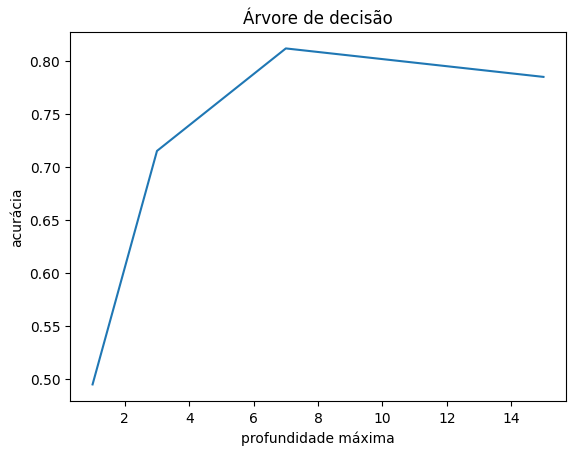

In [16]:
depths = [1, 3, 7, 15]
acuracia = []
for i in depths:
  # iniciar o modelo como árvore de decisão
  model = DecisionTreeClassifier(random_state=84, max_depth=i)#MAX PROFUNDIDADE
  # treinar o modelo
  model.fit(trainData, trainLabels)
  predictions = model.predict(validationData)
  acuracia.append(accuracy_score(predictions, validationLabels))
  #print(classification_report(validationLabels, predictions))#VE A PRECISAO REVOCAÇÃO METRICA E ACURACIA
plt.plot(depths, acuracia)
plt.title('Árvore de decisão')
plt.xlabel('profundidade máxima')
plt.ylabel('acurácia')
plt.show()

# Plotar a acurácia (eixo y) e hiperparâmetro (eixo x) para K-NN

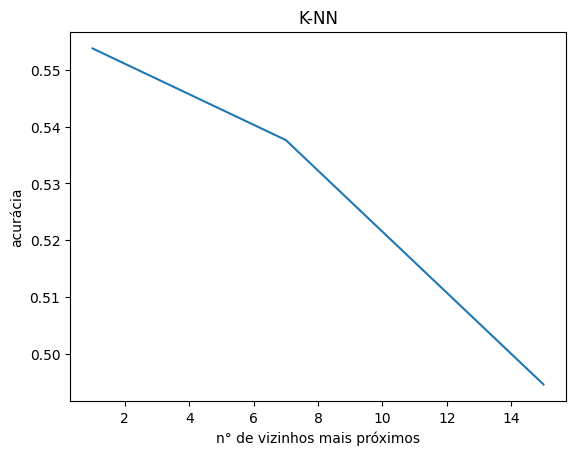

In [17]:
knn = [1, 3, 7, 15]
acuracia = []
for i in knn:
  # iniciar o modelo como vizinhos próximos
  model = KNeighborsClassifier(n_neighbors=i)#MAX PROFUNDIDADE
  # treinar o modelo
  model.fit(trainData, trainLabels)
  predictions = model.predict(validationData)
  acuracia.append(accuracy_score(predictions, validationLabels))
  #print(classification_report(validationLabels, predictions))#VE A PRECISAO REVOCAÇÃO METRICA E ACURACIA
plt.plot(knn, acuracia)
plt.title('K-NN')
plt.xlabel('n° de vizinhos mais próximos')
plt.ylabel('acurácia')
plt.show()

# 3.

In [18]:
#transformando os numpy.ndarray em lista pra concatenar test e validation ###np.vstack# mas ta certo
trainDataTrans = trainData.tolist()
validationDataTrans = validationData.tolist()
trainDataNova = trainDataTrans + validationDataTrans
trainLabelsTrans = trainLabels.tolist()
validationLabelsTrans = validationLabels.tolist()
trainLabelsNova = trainLabelsTrans + validationLabelsTrans
# iniciar o modelo como árvore de decisão
model = DecisionTreeClassifier(random_state=84, max_depth=7)#MAX PROFUNDIDADE
# treinar o modelo
print("[INFO] treinando modelo...")
model.fit(trainDataNova, trainLabelsNova)
print("[INFO] avaliando...")
predictions = model.predict(testData)
print(classification_report(testLabels, predictions))#VE A PRECISAO REVOCAÇÃO METRICA E ACURACIA
print(confusion_matrix(testLabels, predictions))

[INFO] treinando modelo...
[INFO] avaliando...
              precision    recall  f1-score   support

       coast       0.69      0.78      0.73        49
      forest       0.87      0.86      0.86        56
     highway       0.82      0.68      0.75        41
      street       0.69      0.72      0.71        40

    accuracy                           0.77       186
   macro avg       0.77      0.76      0.76       186
weighted avg       0.77      0.77      0.77       186

[[38  3  4  4]
 [ 3 48  0  5]
 [ 8  1 28  4]
 [ 6  3  2 29]]


In [19]:
# iniciar o modelo como vizinhos próximos
knn = KNeighborsClassifier(n_neighbors=2)#MAX VIZINHOS
# treinar o modelo
print("[INFO] treinando modelo...")
knn.fit(trainDataNova, trainLabelsNova)
print("[INFO] avaliando...")
predictions = knn.predict(testData)
print(classification_report(testLabels, predictions))#VE A PRECISAO REVOCAÇÃO METRICA E ACURACIA
print(confusion_matrix(testLabels, predictions))

[INFO] treinando modelo...
[INFO] avaliando...
              precision    recall  f1-score   support

       coast       0.42      0.63      0.51        49
      forest       0.67      0.70      0.68        56
     highway       0.50      0.34      0.41        41
      street       0.59      0.40      0.48        40

    accuracy                           0.54       186
   macro avg       0.55      0.52      0.52       186
weighted avg       0.55      0.54      0.53       186

[[31  4 10  4]
 [ 9 39  2  6]
 [22  4 14  1]
 [11 11  2 16]]


# Conclusão
Podemos observar, pelo relatório de classificação e pela matriz de confusão, que a Árvore de decisão possui um desempenho muito maior que os vizinhos mais próximos para esse problema